# Berlin Trees Exploratory Analysis
This notebook loads the Berlin tree cadastre dataset (Straßenbäume Berlin) and performs exploratory data analysis.

**Important:** Download the dataset manually from the Berlin Open Data Portal and save it as a csv or geojson file in the same folder as this notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loaded the dataset from https://hub.arcgis.com/datasets/esri-de-content::baumkataster-berlin/about
df = pd.read_csv('Baumkataster_Berlin_-1586189165523919690.csv')
df.head()

/var/folders/_d/r6vqd8xn11sb_7lc0mrn4bcr0000gn/T/ipykernel_89670/3712878658.py:5: DtypeWarning: Columns (3,9,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baumkataster_Berlin_-1586189165523919690.csv')


,OBJECTID,Baum ID,Standort Nr,Kennzeich,Objektname,Art,Art Botanisch,Gattung,Gattung Botanisch,Pflanzjahr,...,Stammumfang (cm),Höhe (m),Bezirk,Eigentümer,Kategorie,Straße,Haus Nr,Adresszusatz,x,y
0,1,00008100:000be4d0,066,411.232,Weigandufer,Eingriffliger Weissdorn,Crataegus monogyna,WEIßDORN,CRATAEGUS,1989.0,...,60.0,NaN,Neukölln,Land Berlin,Anlagebaum,NaN,NaN,NaN,1.497053e+06,6.887668e+06
1,2,00008100:000be4d2,059,411.232,Weigandufer,Hahnensporn-Weissdorn,Crataegus crus-galli,WEIßDORN,CRATAEGUS,1994.0,...,37.0,NaN,Neukölln,Land Berlin,Anlagebaum,NaN,NaN,NaN,1.497114e+06,6.887745e+06
2,3,00008100:000be4f2,062,411.232,Weigandufer,Pflaumenblättriger Weiss-Dorn,Crataegus prunifolia,WEIßDORN,CRATAEGUS,1987.0,...,65.0,NaN,Neukölln,Land Berlin,Anlagebaum,NaN,NaN,NaN,1.497087e+06,6.887710e+06
3,4,00008100:000bf296,14,221.068,Roetepfuhl-Grünanlage,Gemeine Rosskastanie,Aesculus hippocastanum,ROSSKASTANIE,AESCULUS,1985.0,...,128.0,NaN,Neukölln,Land Berlin,Anlagebaum,NaN,NaN,NaN,1.494880e+06,6.880369e+06
4,5,00008100:000bf297,13,221.068,Roetepfuhl-Grünanlage,Gemeine Rosskastanie,Aesculus hippocastanum,ROSSKASTANIE,AESCULUS,1985.0,...,112.0,NaN,Neukölln,Land Berlin,Anlagebaum,NaN,NaN,NaN,1.494888e+06,6.880378e+06


## Basic Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839693 entries, 0 to 839692
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   OBJECTID                839693 non-null  int64  
 1   Baum ID                 839693 non-null  object 
 2   Standort Nr             839691 non-null  object 
 3   Kennzeich               839693 non-null  object 
 4   Objektname              839693 non-null  object 
 5   Art                     838719 non-null  object 
 6   Art Botanisch           838720 non-null  object 
 7   Gattung                 811884 non-null  object 
 8   Gattung Botanisch       838719 non-null  object 
 9   Pflanzjahr              693920 non-null  object 
 10  Standalter              693941 non-null  float64
 11  Krone Durchschnitt (m)  496191 non-null  float64
 12  Stammumfang (cm)        834602 non-null  float64
 13  Höhe (m)                686744 non-null  float64
 14  Bezirk              

## Summary Statistics

In [3]:
df.describe()

,OBJECTID,Standalter,Krone Durchschnitt (m),Stammumfang (cm),Höhe (m),x,y
count,839693.000000,693941.000000,496191.000000,834602.000000,686744.000000,8.396930e+05,8.396930e+05
mean,419847.000000,46.254976,7.202931,116.880759,13.652891,1.491079e+06,6.892881e+06
std,242398.634131,36.881108,13.911658,194.390873,54.266488,1.371855e+04,1.087527e+04
min,1.000000,-19989.000000,0.000000,0.000000,0.000000,1.457340e+06,6.862052e+06
25%,209924.000000,27.000000,4.000000,63.000000,8.000000,1.481221e+06,6.883706e+06
50%,419847.000000,42.000000,6.000000,101.000000,12.000000,1.490878e+06,6.893561e+06
75%,629770.000000,61.000000,9.000000,153.000000,17.000000,1.501511e+06,6.900482e+06
max,839693.000000,2022.000000,6800.000000,97106.000000,25700.000000,1.531395e+06,6.920335e+06


## Distribution of Tree Species

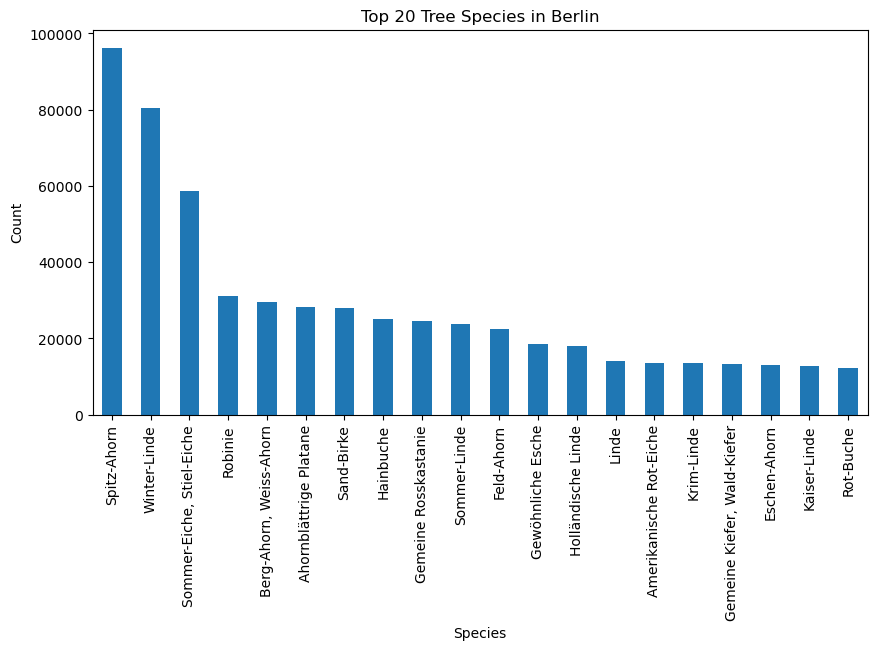

In [6]:
species_counts = df['Art'].value_counts().head(20)
species_counts.plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Tree Species in Berlin')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## Geographic Distribution (Scatter Plot)
Note: This uses lon/lat columns, typically named *'spatial_longitude'* and *'spatial_latitude'*, but adjust based on your dataset.

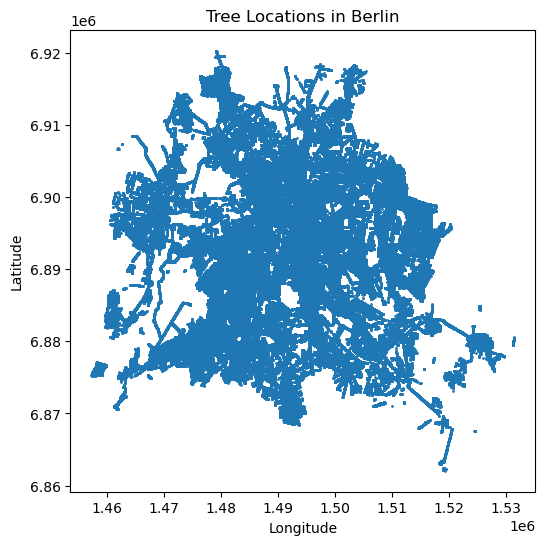

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(df['x'], df['y'], s=1)
plt.title('Tree Locations in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [9]:
import geopandas as gpd

# WFS URL
url = (
    "https://gdi.berlin.de/services/wfs/baumbestand"
    "?service=WFS&version=2.0.0&request=GetFeature"
    "&typeNames=baumbestand:strassenbaeume"
    "&outputFormat=application/json"
)

# Load into a GeoDataFrame
gdf = gpd.read_file(url)

# Inspect
print(gdf.head())
print(gdf.crs)


                                 id              gisid              pitid  \
0  strassenbaeume.00008100_000bbafb  00008100_000bbafb  00008100:000bbafb   
1  strassenbaeume.00008100_000bbafd  00008100_000bbafd  00008100:000bbafd   
2  strassenbaeume.00008100_000bbafe  00008100_000bbafe  00008100:000bbafe   
3  strassenbaeume.00008100_000bbaff  00008100_000bbaff  00008100:000bbaff   
4  strassenbaeume.00008100_000bbb00  00008100_000bbb00  00008100:000bbb00   

  standortnr kennzeich              namenr                art_dtsch  \
0         93     01414  Fritz-Reuter-Allee      Pyramiden-Hainbuche   
1         91     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
2         90     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
3         89     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
4         88     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   

                         art_bot gattung_deutsch   gattung  ...      hausnr  \
0  Carpinus betulus 'Fastigiata

In [10]:
gdf = gdf.to_crs(epsg=4326)

In [11]:
gdf.to_file("berlin_strassenbaeume.geojson", driver="GeoJSON")

In [ ]:
# Berlin Street Trees Exploratory Data Analysis
# Using GeoJSON from Berlin WFS service

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [12]:

# Load GeoJSON file (replace path if needed)
gdf = gpd.read_file('berlin_strassenbaeume.geojson')

# Inspect the first rows
print(gdf.head())

# Check coordinate reference system
print('CRS:', gdf.crs)


                                 id              gisid              pitid  \
0  strassenbaeume.00008100_000bbafb  00008100_000bbafb  00008100:000bbafb   
1  strassenbaeume.00008100_000bbafd  00008100_000bbafd  00008100:000bbafd   
2  strassenbaeume.00008100_000bbafe  00008100_000bbafe  00008100:000bbafe   
3  strassenbaeume.00008100_000bbaff  00008100_000bbaff  00008100:000bbaff   
4  strassenbaeume.00008100_000bbb00  00008100_000bbb00  00008100:000bbb00   

  standortnr kennzeich              namenr                art_dtsch  \
0         93     01414  Fritz-Reuter-Allee      Pyramiden-Hainbuche   
1         91     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
2         90     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
3         89     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
4         88     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   

                         art_bot gattung_deutsch   gattung  ...      hausnr  \
0  Carpinus betulus 'Fastigiata

In [13]:

# Convert to WGS84 if necessary
gdf = gdf.to_crs(epsg=4326)

# Basic info about dataset
print(gdf.info())
print(gdf.describe())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 434035 entries, 0 to 434034
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               434035 non-null  object  
 1   gisid            434035 non-null  object  
 2   pitid            431949 non-null  object  
 3   standortnr       431947 non-null  object  
 4   kennzeich        431949 non-null  object  
 5   namenr           431949 non-null  object  
 6   art_dtsch        431939 non-null  object  
 7   art_bot          431939 non-null  object  
 8   gattung_deutsch  422235 non-null  object  
 9   gattung          431939 non-null  object  
 10  art_gruppe       431939 non-null  object  
 11  strname          424270 non-null  object  
 12  hausnr           262392 non-null  object  
 13  zusatz           47671 non-null   object  
 14  pflanzjahr       431734 non-null  object  
 15  standalter       431767 non-null  float64 
 16  kronedurch  

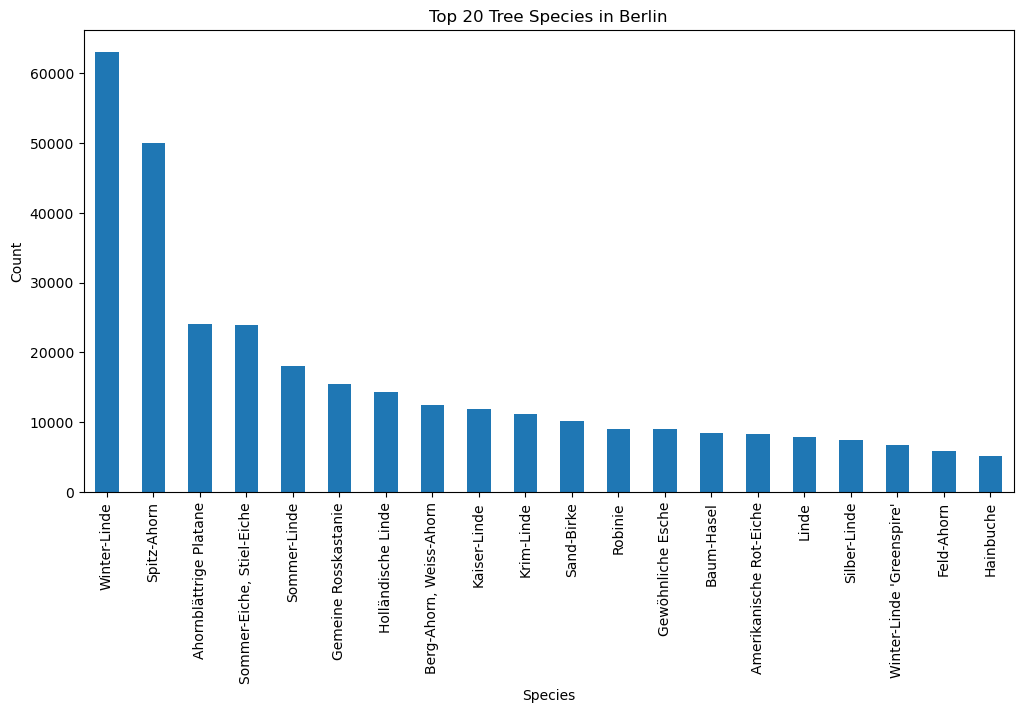

In [14]:

# Top 20 tree species distribution
if 'art_dtsch' in gdf.columns:
    species_counts = gdf['art_dtsch'].value_counts().head(20)
    species_counts.plot(kind='bar', figsize=(12,6))
    plt.title('Top 20 Tree Species in Berlin')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.show()
else:
    print('Column "art_dtsch" not found.')


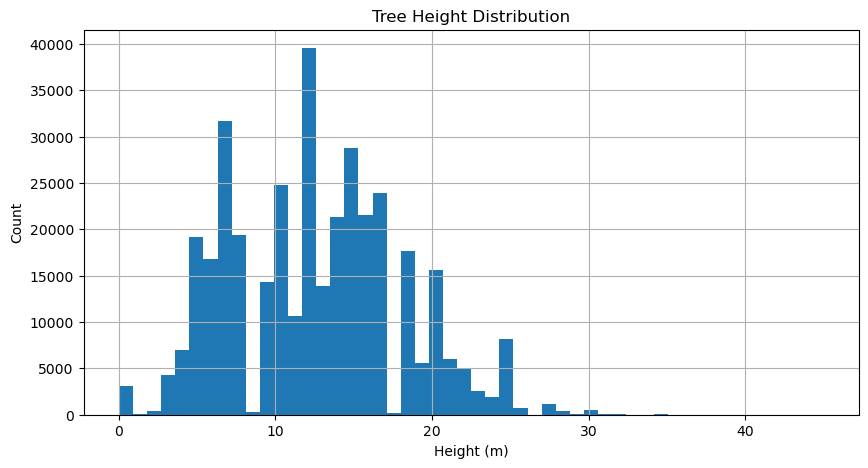

In [16]:

# Tree height distribution (if column exists)
if 'baumhoehe' in gdf.columns:
    plt.figure(figsize=(10,5))
    gdf['baumhoehe'].hist(bins=50)
    plt.title('Tree Height Distribution')
    plt.xlabel('Height (m)')
    plt.ylabel('Count')
    plt.show()


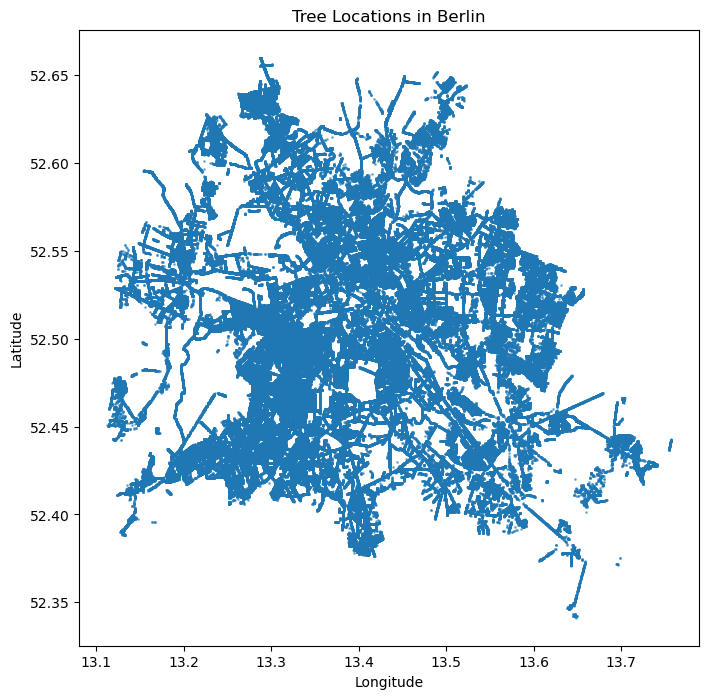

                      art_dtsch                   geometry
142073  Amerikanische Rot-Eiche  POINT (13.30284 52.56885)
391243             Winter-Linde  POINT (13.20312 52.52246)
118989     Gemeine Rosskastanie  POINT (13.31878 52.62483)
235092              Spitz-Ahorn  POINT (13.47082 52.49524)
181233                Hainbuche  POINT (13.39347 52.38763)


In [17]:

# Geographic scatter plot of trees
plt.figure(figsize=(8,8))
plt.scatter(gdf.geometry.x, gdf.geometry.y, s=1, alpha=0.5)
plt.title('Tree Locations in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Optional: sample 5 trees with their species and coordinates
print(gdf[['art_dtsch', 'geometry']].sample(5))
